<a href="https://colab.research.google.com/github/LaurentiuZorila/product-category-prediction/blob/main/notebooks/analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PASUL 1 — Incarcare librarii, incarcare CSV, explorare date

In [1]:
# ============================================
# STEP 1: Import basic libraries
# ============================================

import pandas as pd
import numpy as np

# Vizualizare
import matplotlib.pyplot as plt
import seaborn as sns

# Setari pentru grafice
sns.set(style="whitegrid", palette="muted", font_scale=1.1)

# ============================================
# STEP 2: Incarcare fisier CSV
# ============================================

# Read csv from url
url = "https://raw.githubusercontent.com/LaurentiuZorila/product-category-prediction/main/data/products.csv"
df = pd.read_csv(url)

# Afisam primele randuri
df.head()


,product ID,Product Title,Merchant ID,Category Label,_Product Code,Number_of_Views,Merchant Rating,Listing Date
0,1,apple iphone 8 plus 64gb silver,1,Mobile Phones,QA-2276-XC,860.0,2.5,5/10/2024
1,2,apple iphone 8 plus 64 gb spacegrau,2,Mobile Phones,KA-2501-QO,3772.0,4.8,12/31/2024
2,3,apple mq8n2b/a iphone 8 plus 64gb 5.5 12mp sim...,3,Mobile Phones,FP-8086-IE,3092.0,3.9,11/10/2024
3,4,apple iphone 8 plus 64gb space grey,4,Mobile Phones,YI-0086-US,466.0,3.4,5/2/2022
4,5,apple iphone 8 plus gold 5.5 64gb 4g unlocked ...,5,Mobile Phones,NZ-3586-WP,4426.0,1.6,4/12/2023


In [2]:
# Forma dataset-ului
print("Shape:", df.shape)

# Informatii despre tipurile de date
df.info()

# Verificam valori lipsa
print("\nMissing values per column:")
print(df.isnull().sum())

# Cate coloane avem?
df.columns

Shape: (35311, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35311 entries, 0 to 35310
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   product ID       35311 non-null  int64  
 1   Product Title    35139 non-null  object 
 2   Merchant ID      35311 non-null  int64  
 3    Category Label  35267 non-null  object 
 4   _Product Code    35216 non-null  object 
 5   Number_of_Views  35297 non-null  float64
 6   Merchant Rating  35141 non-null  float64
 7    Listing Date    35252 non-null  object 
dtypes: float64(2), int64(2), object(4)
memory usage: 2.2+ MB

Missing values per column:
product ID           0
Product Title      172
Merchant ID          0
 Category Label     44
_Product Code       95
Number_of_Views     14
Merchant Rating    170
 Listing Date       59
dtype: int64


Index(['product ID', 'Product Title', 'Merchant ID', ' Category Label',
       '_Product Code', 'Number_of_Views', 'Merchant Rating',
       ' Listing Date  '],
      dtype='object')

In [4]:
# Curatam whitespace din numele coloanelor
df.columns = df.columns.str.strip()

# Verificam din nou coloanele
df.columns

Index(['product ID', 'Product Title', 'Merchant ID', 'Category Label',
       '_Product Code', 'Number_of_Views', 'Merchant Rating', 'Listing Date'],
      dtype='object')

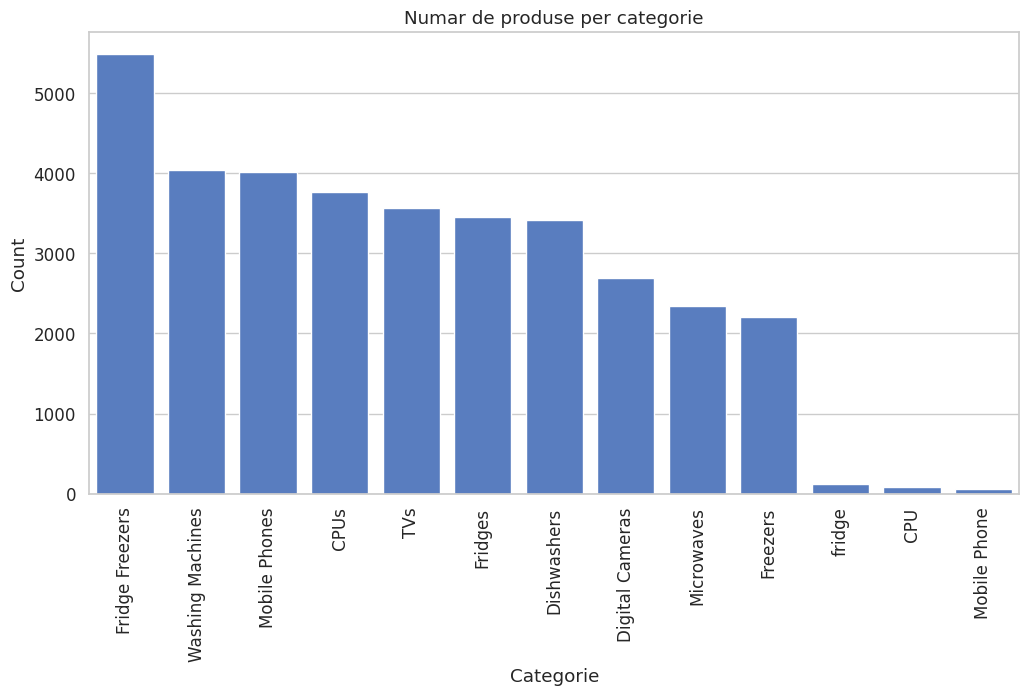

,count
Category Label,
Fridge Freezers,5495
Washing Machines,4036
Mobile Phones,4020
CPUs,3771
TVs,3564
Fridges,3457
Dishwashers,3418
Digital Cameras,2696
Microwaves,2338


In [5]:
# Numar de produse per categorie
category_counts = df['Category Label'].value_counts()

plt.figure(figsize=(12, 6))
sns.barplot(x=category_counts.index, y=category_counts.values)
plt.xticks(rotation=90)
plt.title("Numar de produse per categorie")
plt.xlabel("Categorie")
plt.ylabel("Count")
plt.show()

category_counts

Pentru modelul nostru, ne intereseaza DOAR:

Product Title > input

Category Label > target

Restul coloanelor sunt irelevante pentru clasificarea pe baza titlului si pot introduce zgomot.

# PASUL 2 — Curatarea datelor (in notebook)

In [6]:
# Pastram doar coloanele necesare pentru modelare
df = df[['Product Title', 'Category Label']]
df.head()

,Product Title,Category Label
0,apple iphone 8 plus 64gb silver,Mobile Phones
1,apple iphone 8 plus 64 gb spacegrau,Mobile Phones
2,apple mq8n2b/a iphone 8 plus 64gb 5.5 12mp sim...,Mobile Phones
3,apple iphone 8 plus 64gb space grey,Mobile Phones
4,apple iphone 8 plus gold 5.5 64gb 4g unlocked ...,Mobile Phones


In [8]:
# Verificam valori lipsa
print("Missing values per column:")
print(df.isnull().sum())

# Eliminam randurile incomplete
df = df.dropna(subset=['Product Title', 'Category Label'])

df.shape

Missing values per column:
Product Title     0
Category Label    0
dtype: int64


(35096, 2)

**Standardizam textul titlurilor**

 - lowercase

 - eliminare spatii multiple

 - eliminare simboluri inutile

In [9]:
import re

def clean_text(text):
    text = text.lower()                     # lowercase
    text = re.sub(r'[^a-z0-9 ]', ' ', text) # pastram doar litere/cifre/spatii
    text = re.sub(r'\s+', ' ', text).strip() # eliminam spatii multiple
    return text

df['clean_title'] = df['Product Title'].apply(clean_text)

df[['Product Title', 'clean_title']].head(10)


,Product Title,clean_title
0,apple iphone 8 plus 64gb silver,apple iphone 8 plus 64gb silver
1,apple iphone 8 plus 64 gb spacegrau,apple iphone 8 plus 64 gb spacegrau
2,apple mq8n2b/a iphone 8 plus 64gb 5.5 12mp sim...,apple mq8n2b a iphone 8 plus 64gb 5 5 12mp sim...
3,apple iphone 8 plus 64gb space grey,apple iphone 8 plus 64gb space grey
4,apple iphone 8 plus gold 5.5 64gb 4g unlocked ...,apple iphone 8 plus gold 5 5 64gb 4g unlocked ...
5,apple iphone 8 plus gold 5.5 64gb 4g unlocked ...,apple iphone 8 plus gold 5 5 64gb 4g unlocked ...
6,apple iphone 8 plus 64 gb space grey,apple iphone 8 plus 64 gb space grey
7,apple iphone 8 plus 64gb space grey,apple iphone 8 plus 64gb space grey
8,apple iphone 8 plus 64gb space grey,apple iphone 8 plus 64gb space grey
9,apple iphone 8 plus 64gb space grey,apple iphone 8 plus 64gb space grey


In [10]:
# Eliminam randurile duplicate dupa titlu + categorie
df = df.drop_duplicates(subset=['clean_title', 'Category Label'])
df.shape

(30880, 3)

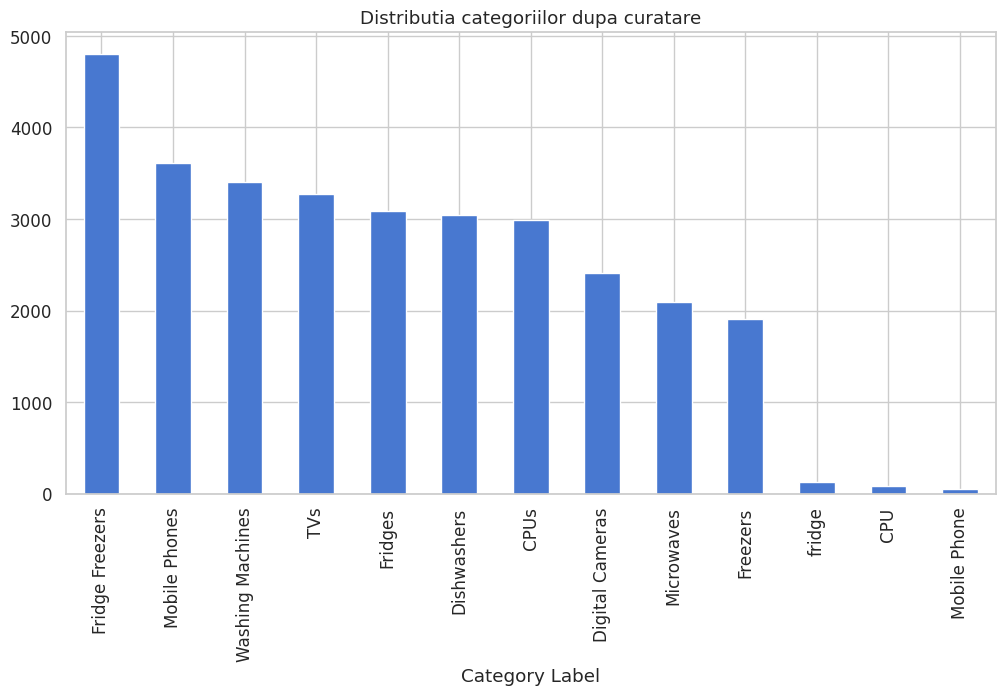

In [11]:
df['Category Label'].value_counts().plot(kind='bar', figsize=(12,6))
plt.title("Distributia categoriilor dupa curatare")
plt.xticks(rotation=90)
plt.show()

# PASUL 3 — FEATURE ENGINEERING

In [12]:
import numpy as np
import re

# 3.1: Numar de cuvinte
df['word_count'] = df['clean_title'].apply(lambda x: len(x.split()))

# 3.2: Numar de caractere
df['char_count'] = df['clean_title'].apply(len)

# 3.3: Contine cifre
df['has_digits'] = df['clean_title'].apply(lambda x: 1 if any(c.isdigit() for c in x) else 0)

# 3.4: Contine cuvinte ALL CAPS (USB, LED, XXL)
def has_all_caps(text):
    words = text.split()
    return 1 if any(w.isupper() and len(w) > 1 for w in words) else 0

df['has_all_caps'] = df['Product Title'].apply(has_all_caps)

# 3.5: Lungimea celui mai lung cuvant
df['max_word_len'] = df['clean_title'].apply(lambda x: max([len(w) for w in x.split()]))

# 3.6: Numar cuvinte scurte (<4 litere)
df['short_words'] = df['clean_title'].apply(lambda x: sum(len(w) < 4 for w in x.split()))

# 3.7: Detectare branduri
# Lista automata extrasa din dataset (cele mai frecvente prime cuvinte)
common_brands = df['clean_title'].apply(lambda x: x.split()[0]).value_counts().head(40).index.tolist()

def detect_brand(text):
    first = text.split()[0]
    return first if first in common_brands else "none"

df['brand'] = df['clean_title'].apply(detect_brand)

# 3.8: Convertim brandul in cod numeric (pentru ML)
df['brand_encoded'] = df['brand'].astype('category').cat.codes

df.head(20)

,Product Title,Category Label,clean_title,word_count,char_count,has_digits,has_all_caps,max_word_len,short_words,brand,brand_encoded
0,apple iphone 8 plus 64gb silver,Mobile Phones,apple iphone 8 plus 64gb silver,6,31,1,0,6,1,apple,3
1,apple iphone 8 plus 64 gb spacegrau,Mobile Phones,apple iphone 8 plus 64 gb spacegrau,7,35,1,0,9,3,apple,3
2,apple mq8n2b/a iphone 8 plus 64gb 5.5 12mp sim...,Mobile Phones,apple mq8n2b a iphone 8 plus 64gb 5 5 12mp sim...,15,70,1,0,10,6,apple,3
3,apple iphone 8 plus 64gb space grey,Mobile Phones,apple iphone 8 plus 64gb space grey,7,35,1,0,6,1,apple,3
4,apple iphone 8 plus gold 5.5 64gb 4g unlocked ...,Mobile Phones,apple iphone 8 plus gold 5 5 64gb 4g unlocked ...,12,54,1,0,8,5,apple,3
6,apple iphone 8 plus 64 gb space grey,Mobile Phones,apple iphone 8 plus 64 gb space grey,8,36,1,0,6,3,apple,3
10,apple iphone 8 plus 5.5 single sim 4g 64gb silver,Mobile Phones,apple iphone 8 plus 5 5 single sim 4g 64gb silver,11,49,1,0,6,5,apple,3
11,sim free iphone 8 plus 64gb by apple space grey,Mobile Phones,sim free iphone 8 plus 64gb by apple space grey,10,47,1,0,6,3,none,29
12,apple iphone 8 plus 64gb gold smartphone,Mobile Phones,apple iphone 8 plus 64gb gold smartphone,7,40,1,0,10,1,apple,3
13,apple iphone 8 plus 5.5 single sim 4g 64gb grey,Mobile Phones,apple iphone 8 plus 5 5 single sim 4g 64gb grey,11,47,1,0,6,5,apple,3


# PASUL 4 — MODELING & EVALUATION


Training: Logistic Regression
Accuracy: 0.9441386010362695

Classification report:
                  precision    recall  f1-score   support

             CPU       0.00      0.00      0.00        17
            CPUs       0.97      0.99      0.98       597
 Digital Cameras       1.00      0.99      0.99       481
     Dishwashers       0.89      0.95      0.92       608
        Freezers       0.99      0.89      0.94       381
 Fridge Freezers       0.95      0.93      0.94       961
         Fridges       0.86      0.90      0.88       618
      Microwaves       0.99      0.94      0.97       419
    Mobile Phone       0.00      0.00      0.00        11
   Mobile Phones       0.94      0.99      0.97       723
             TVs       0.96      0.99      0.98       655
Washing Machines       0.94      0.94      0.94       680
          fridge       0.00      0.00      0.00        25

        accuracy                           0.94      6176
       macro avg       0.73      0.73      0

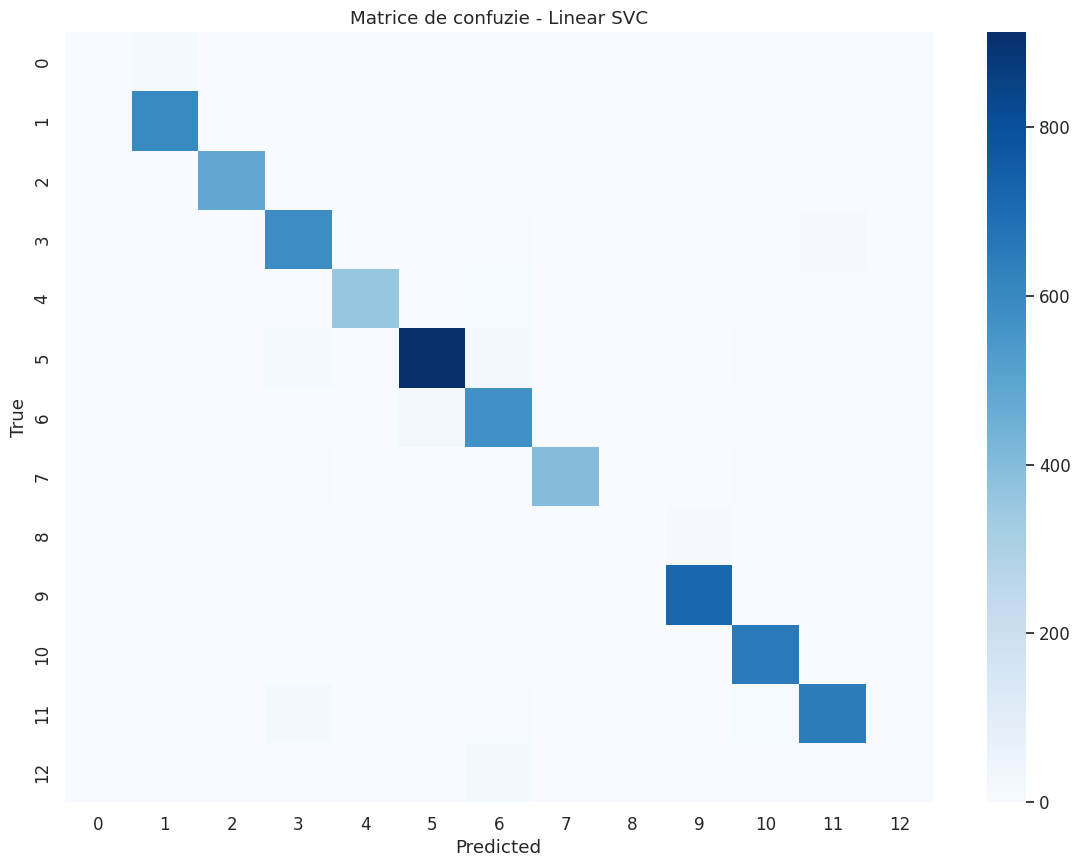

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC

import seaborn as sns
import matplotlib.pyplot as plt

# 4.1: Pregatim datele
X = df['clean_title']
y = df['Category Label']

# 4.2: TF-IDF
tfidf = TfidfVectorizer()
X_tfidf = tfidf.fit_transform(X)

# 4.3: Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X_tfidf, y, test_size=0.2, random_state=42, stratify=y
)

# 4.4: Modele
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=200),
    "Linear SVC": LinearSVC()
}

results = {}

for name, model in models.items():
    print("\n===============================")
    print("Training:", name)
    print("===============================")

    model.fit(X_train, y_train)
    preds = model.predict(X_test)

    acc = accuracy_score(y_test, preds)
    results[name] = acc

    print("Accuracy:", acc)
    print("\nClassification report:")
    # print(classification_report(y_test, preds))
    print(classification_report(y_test, preds, zero_division=0))

# 4.5: Alegem modelul cel mai bun
best_model_name = max(results, key=results.get)
best_model = models[best_model_name]

print("\nCel mai bun model este:", best_model_name)

# 4.6: Matrice de confuzie
preds = best_model.predict(X_test)
cm = confusion_matrix(y_test, preds)

plt.figure(figsize=(14, 10))
sns.heatmap(cm, cmap="Blues")
plt.title(f"Matrice de confuzie - {best_model_name}")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


# Observatie:
### RandomForest a generat un warning deoarece nu a prezis unele categorii.
### Acest lucru este normal in clasificarea textului, iar modelele LineaSVC si Logistic Regression au performat mai bine si nu au avut acest comportament.
### Am adaugat zero_division=0 pentru a trece peste mesajul de avertisement


# PASUL 5 — Salvarea modelului și a vectorizatorului (.pkl)

In [16]:
import pickle

# Cream folderul models/ daca nu exista
import os
if not os.path.exists("/content/product-category-prediction/models"):
    os.makedirs("/content/product-category-prediction/models")

# 5.1 Salvam modelul final
model_path = "/content/product-category-prediction/models/final_model.pkl"
with open(model_path, "wb") as f:
    pickle.dump(best_model, f)

# 5.2 Salvam vectorizatorul TF-IDF
tfidf_path = "/content/product-category-prediction/models/tfidf_vectorizer.pkl"
with open(tfidf_path, "wb") as f:
    pickle.dump(tfidf, f)

print("Model and TF-IDF saved successfully:")
print(model_path)
print(tfidf_path)


Model and TF-IDF saved successfully:
/content/product-category-prediction/models/final_model.pkl
/content/product-category-prediction/models/tfidf_vectorizer.pkl
